In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
# data set from: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?select=Car+details+v3.csv
# prices are in INR (Indian Rupees) [ 1 USD approx. 73 INR ]

plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})
data_path = 'data/SVD-Visualization/cars.csv'

# Prepare data

In [3]:
data = pd.read_csv(data_path)

data.drop(['name', 'torque', 'mileage'], axis=1, inplace=True)


In [4]:
# check if any other values are not 'CC'

_all = set()
for _, entry in data.iterrows():
    col = 'engine'
    value = entry[col]
    if not pd.isna(value):
        split = entry[col].split(" ")
        _all.add(split[1])
        if len(split) != 2:
            print("ERROR")

print(_all)

{'CC'}


In [5]:
# check if any other values are not 'bhp'

# filter out erroneous data
data = data.loc[data['max_power'] != "0"]
data = data.loc[data['max_power'] != " bhp"]


_all = set()
for i, entry in data.iterrows():
    col = 'max_power'
    value = entry[col]
    if not pd.isna(value):
        split = entry[col].split(" ")
        if len(split) != 2:
            print(f"ERROR at index {i}")
        _all.add(split[1])


print(_all)

{'bhp'}


In [6]:
# map CC to int

col = 'engine'
data[col] = data[col].apply(
    lambda x: int(x.split(" ")[0]) if not pd.isna(x) else x
)

# map bhp to float

col = 'max_power'
data[col] = data[col].apply(
    lambda x: float(x.split(" ")[0]) if not pd.isna(x) else x
)

In [7]:
# just discovered that all values with missing info are missing
# engine, max_power AND seats.
# therefore drop  them
print(f"Nr of Cars (pre Drop): {data.shape[0]}")
data.dropna(inplace=True)
print(f"Nr of Cars (post Drop): {data.shape[0]}")


Nr of Cars (pre Drop): 8121
Nr of Cars (post Drop): 7906


In [8]:
# label encode the categorical features

le = LabelEncoder()
col = 'transmission'
data[col] = le.fit_transform(data[col])
print(f"Legend for '{col}': {le.classes_}. NaN: {data[col].isna().sum()}")

col = 'fuel'
data[col] = le.fit_transform(data[col])
print(f"Legend for '{col}': {le.classes_}. NaN: {data[col].isna().sum()}")

col = 'seller_type'
data[col] = le.fit_transform(data[col])
print(f"Legend for '{col}': {le.classes_}. NaN: {data[col].isna().sum()}")

col = 'owner'
data[col] = le.fit_transform(data[col])
print(f"Legend for '{col}': {le.classes_}. NaN: {data[col].isna().sum()}")


Legend for 'transmission': ['Automatic' 'Manual']. NaN: 0
Legend for 'fuel': ['CNG' 'Diesel' 'LPG' 'Petrol']. NaN: 0
Legend for 'seller_type': ['Dealer' 'Individual' 'Trustmark Dealer']. NaN: 0
Legend for 'owner': ['First Owner' 'Fourth & Above Owner' 'Second Owner' 'Test Drive Car'
 'Third Owner']. NaN: 0


# SVD

In [9]:
# features = data[['max_power', 'year']]

In [10]:
label_id = "selling_price"
features = data.drop(label_id, axis = 1)
label = data[label_id]
features = features.to_numpy()
label = label.to_numpy()

In [11]:
U, S, VT = np.linalg.svd(features, full_matrices=False)

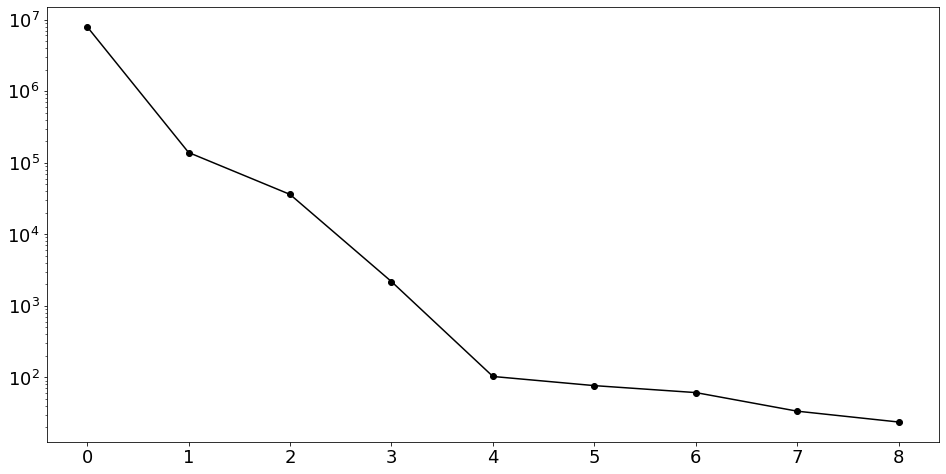

In [12]:
fig1 = plt.figure()

ax1 = fig1.add_subplot(111)
ax1.semilogy(S, '-o', color='k')

plt.show()

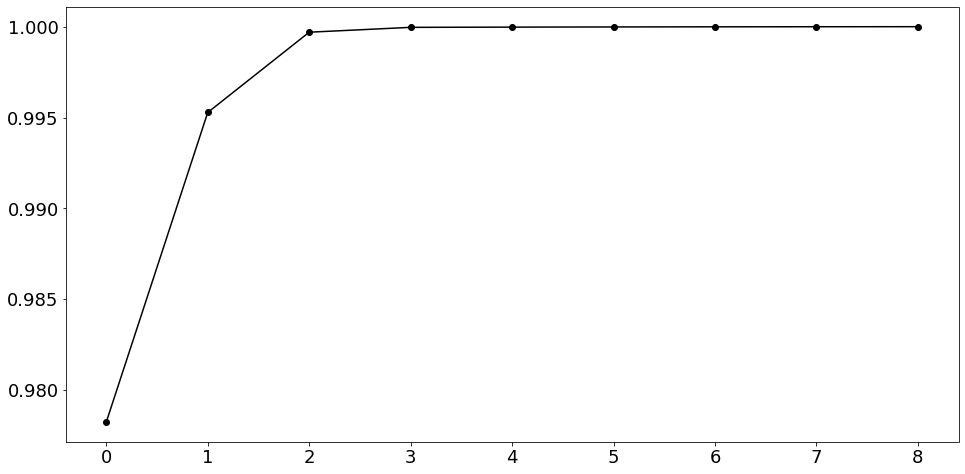

In [13]:
fig2 = plt.figure()

ax2 = fig2.add_subplot(111)
ax2.plot(np.cumsum(S) / np.sum(S), '-o', color='k')

plt.show()

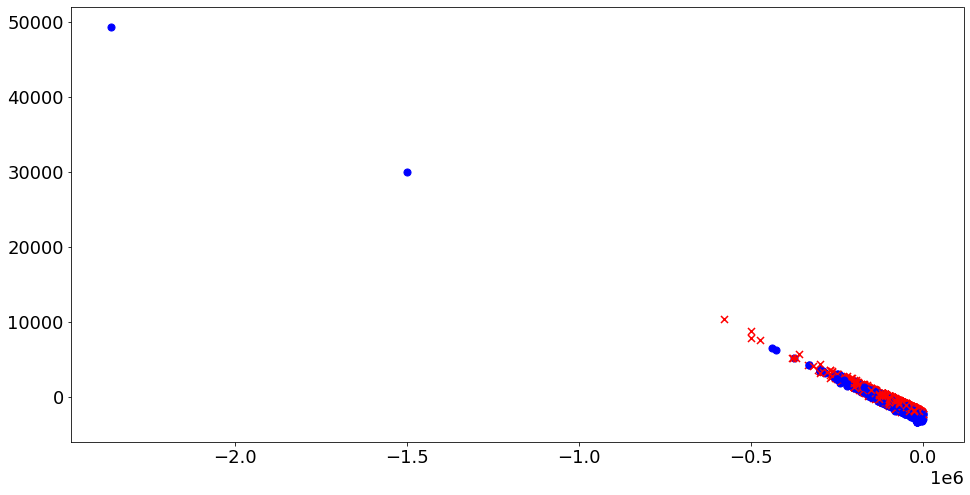

In [14]:
mark_red_cars_below_x_rupees = 500_000

fig2 = plt.figure()
ax = fig2.add_subplot(111)

for j in range(features.shape[0]):
    x = VT[0, :] @ features[j, :].T
    y = VT[1, :] @ features[j, :].T

    if label[j] < mark_red_cars_below_x_rupees:
        ax.scatter(x, y, marker='x', color='r', s=50)
    else:
        ax.scatter(x, y, marker='o', color='b', s=50)

plt.show()